In [1]:
from music21 import *

In [16]:
note

<module 'music21.note' from '/Users/kaka/music21-env/lib/python3.6/site-packages/music21/note.py'>

In [17]:
f = note.Note("F5")

In [4]:
print(f.name)
print(f.octave)
print(f.pitch)

F
5
F5


In [20]:
dir(f)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activeSite',
 '_activeSiteStoredOffset',
 '_adjacencySearch',
 '_classListCacheDict',
 '_classListFullyQualifiedCacheDict',
 '_classSetCacheDict',
 '_deepcopySubclassable',
 '_derivation',
 '_duration',
 '_editorial',
 '_getAccidental',
 '_getActiveSite',
 '_getColor',
 '_getDerivation',
 '_getDuration',
 '_getEditorial',
 '_getFrequency',
 '_getLyric',
 '_getMeasureOffset',
 '_getMeasureOffsetOrMeterModulusOffset',
 '_getMicrotone',
 '_getMidi',
 '_getName',
 '_getNameWithOctave',
 '_getNotehead',
 '_getNoteheadFill',
 '_getNoteheadParenthe

In [22]:
f.pitch.frequency



698.456462866008

In [23]:
f.pitch.pitchClassString

'5'

In [26]:
b = note.Note("b-2")

In [27]:
b.pitch.accidental

<accidental flat>

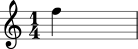

In [28]:
f.show()

In [29]:
f.show('midi')

In [50]:
chord_string

NameError: name 'chord_string' is not defined

In [51]:
data.show('midi')

In [9]:
def abstract_chord(c, chord_string, key_of_song):

    root_chord_pitch = key_of_song.tonic
    chord_elements = [(pc - c.root().midi) % 12 for pc in c.normalOrder]

    # chord stucture exceptions
    if len(chord_string) > 1:
        elementType = chord_string[1:]
        if elementType[0] == '-':
            elementType = chord_string[2:]
            elementChar = chord_string[:2]
        else:
            elementChar = chord_string[0]
    
        if '/o' in elementType:
            if elementType.count('/') == 2:
                elementBottom = c.bass()
                elementBottomNum = root_chord_pitch.midi - elementBottom.midi
                while elementBottomNum < 0:
                    elementBottomNum += 12
                while elementBottomNum > 11:
                    elementBottomNum -= 12
                elementType = elementType[:(elementType[2:].find('/') + 3)] + str(elementBottomNum)

        else:
            if '/' in elementType:
                elementBottom = c.bass()
                elementBottomNum = root_chord_pitch.midi - elementBottom.midi
                while elementBottomNum < 0:
                    elementBottomNum += 12
                while elementBottomNum > 11:
                    elementBottomNum -= 12
                elementType = elementType[:(elementType.find('/') + 1)] + str(elementBottomNum)

    else:
        elementChar = chord_string[0]

    elementNum = note.Note(elementChar + '3').pitch.midi - root_chord_pitch.midi

#     elementNum = root_chord_pitch.midi - c.root().midi

    # print('element num :', elementNum)

    while elementNum < 0:
        elementNum += 12

    while elementNum > 11:
        elementNum -= 12

    if elementNum == 0:
        elementChord = 'T'
    elif elementNum == 2:
        elementChord = 'SD2'
    elif elementNum == 3:
        elementChord = 'Tb3'
    elif elementNum == 4:
        elementChord = 'T3'
    elif elementNum == 5:
        elementChord = 'SD'
    elif elementNum == 7:
        elementChord = 'D'
    elif elementNum == 9:
        elementChord = 'T6'
    elif elementNum == 10:
        elementChord = 'D10'
    elif elementNum == 11:
        elementChord = 'D11'
    else:
        elementChord = 'X' + str(elementNum)
    
    elementType = ''

    for element in chord_elements[:-1]:
        elementType += str(element) + ','
    elementType += str(chord_elements[-1])

#     chord_info = "%s_%s_%.3f" % (elementChord, elementType, c.quarterLength)
    chord_info = "%s_%s_%.3f" % (elementChord, elementType, c.quarterLength)

    return chord_info




In [30]:
filename = 'ex.mid'

melody_track_index = 0
chord_track_index = 1

data = converter.parse(filename)

# if len(data) < 2:
#     return 'Track number error', None, None, None, None, None


In [36]:
data[0]

<music21.stream.Part 0x1093f2860>

In [37]:
melody_voice = data[melody_track_index]
chord_voice = data[chord_track_index]

In [40]:
time_signature = chord_voice.getElementsByClass(meter.TimeSignature)[0]

ts = time_signature.ratioString

beats_per_measure = 4.0 # default value

if ts == '4/4':
    beats_per_measure = 4.0
elif ts == '3/4':
    beats_per_measure = 3.0
elif ts == '6/8':
    beats_per_measure = 3.0




In [58]:
melody_voice.elements[13].duration


<music21.duration.Duration 0.5>

In [43]:
key_of_song = data.analyze('key')

In [44]:
key_of_song

<music21.key.Key of C major>

In [47]:
chord_voice.elements

(<music21.key.Key of C major>,
 <music21.meter.TimeSignature 4/4>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord G3 B3 D4 F4>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.key.Key of C major>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord F3 A3 C4>,
 <music21.chord.Chord F3 A3 C4>,
 <music21.chord.Chord D3 F#3 A3>,
 <music21.chord.Chord D3 F#3 A3>,
 <music21.chord.Chord G3 B3 D4>,
 <music21.chord.Chord G3 B3 D4>,
 <music21.chord.Chord G3 B3 D4>,
 <music21.chord.Chord G3 B3 D4>,
 <music21.ch

In [48]:
chord_stream = stream.Voice()
chord_string_list = []
abstract_chord_string = ''

for c in chord_voice.getElementsByClass(chord.Chord).elements:

    # 1) set up chord stream for this song
    chord_stream.append(c)

    # 2) set up chord string for this song
    # v6.2 switched to number representation 
    # a little tedious procedure to get better chord name output using music21 function
    tmp_pitch_list = []
    for p in c.pitches:
        if '#' in str(p):
            p = p.getEnharmonic()
        tmp_pitch_list.append(p)
    tmp_chord = chord.Chord(tmp_pitch_list)

    tmp_chord = c.simplifyEnharmonics() # better results with this somehow

    tmp_chord_string = harmony.chordSymbolFigureFromChord(tmp_chord, False)

    if (tmp_chord_string == 'Chord Symbol Cannot Be Identified'):
        print('Chord symbol identification error, trying pitch enharmonic :', tmp_chord)

        tmp_pitch_list = []
        for p in c.pitches:
            if '#' in str(p):
                p = p.getEnharmonic()
            tmp_pitch_list.append(p)
        tmp_chord = chord.Chord(tmp_pitch_list)
        tmp_chord_string = harmony.chordSymbolFigureFromChord(tmp_chord, False)

        if (tmp_chord_string == 'Chord Symbol Cannot Be Identified'):
            print('pitch enharmonic not worked. :', tmp_chord)
#             return 'Chord symbol error', None, None, None, None, None
        else:
            print('pitch enharmonic worked. :', tmp_chord_string, tmp_chord)

    if 'add' in tmp_chord_string:
        tmp_chord_string = tmp_chord_string.split('add', 1)[0]
        
    print(tmp_chord_string)
    
     abstract_chord_string = abstract_chord(c, tmp_chord_string, key_of_song)
    
    print(abstract_chord_string)
    chord_string_list.append(abstract_chord_string)
#     chord_string += abstract_chord_string




G7
D_4,7,10,0_4.000
G7
D_4,7,10,0_4.000
C
T_0,4,7_4.000
C
T_0,4,7_4.000
G7
D_4,7,10,0_4.000
G7
D_4,7,10,0_4.000
G7
D_4,7,10,0_4.000
C
T_0,4,7_4.000
G7
D_4,7,10,0_4.000
G7
D_4,7,10,0_4.000
C
T_0,4,7_4.000
C
T_0,4,7_4.000
G7
D_4,7,10,0_4.000
G7
D_4,7,10,0_4.000
G7
D_4,7,10,0_4.000
C
T_0,4,7_4.000
C
T_0,4,7_4.000
C
T_0,4,7_4.000
F
SD_0,4,7_4.000
F
SD_0,4,7_4.000
D
SD2_0,4,7_4.000
D
SD2_0,4,7_4.000
G
D_0,4,7_4.000
G
D_0,4,7_4.000
G
D_0,4,7_4.000
G
D_0,4,7_4.000
C
T_0,4,7_4.000
C
T_0,4,7_4.000
F
SD_0,4,7_4.000
F
SD_0,4,7_4.000
D
SD2_0,4,7_4.000
D
SD2_0,4,7_4.000
G
D_0,4,7_4.000
G
D_0,4,7_4.000
G
D_0,4,7_4.000
C
T_0,4,7_4.000


In [15]:
chord_string_list

['D_4,7,10,0_4.000',
 'D_4,7,10,0_4.000',
 'T_0,4,7_4.000',
 'T_0,4,7_4.000',
 'D_4,7,10,0_4.000',
 'D_4,7,10,0_4.000',
 'D_4,7,10,0_4.000',
 'T_0,4,7_4.000',
 'D_4,7,10,0_4.000',
 'D_4,7,10,0_4.000',
 'T_0,4,7_4.000',
 'T_0,4,7_4.000',
 'D_4,7,10,0_4.000',
 'D_4,7,10,0_4.000',
 'D_4,7,10,0_4.000',
 'T_0,4,7_4.000',
 'T_0,4,7_4.000',
 'T_0,4,7_4.000',
 'SD_0,4,7_4.000',
 'SD_0,4,7_4.000',
 'SD2_0,4,7_4.000',
 'SD2_0,4,7_4.000',
 'D_0,4,7_4.000',
 'D_0,4,7_4.000',
 'D_0,4,7_4.000',
 'D_0,4,7_4.000',
 'T_0,4,7_4.000',
 'T_0,4,7_4.000',
 'SD_0,4,7_4.000',
 'SD_0,4,7_4.000',
 'SD2_0,4,7_4.000',
 'SD2_0,4,7_4.000',
 'D_0,4,7_4.000',
 'D_0,4,7_4.000',
 'D_0,4,7_4.000',
 'T_0,4,7_4.000']